In [3]:
import ot
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [4]:
mu1 = np.array([0, 0])
mu2 = np.array([0, 4])
cov1 = cov2 = 0.05 * np.eye(2)
x = np.concatenate([
    np.random.multivariate_normal(mu1, cov1, 300),
    np.random.multivariate_normal(mu2, cov2, 300)
], axis=0)

In [5]:
mu1 = np.array([-2, 2])
mu2 = np.array([2, 2])
cov1 = cov2 = 0.05 * np.eye(2)
y = np.concatenate([
    np.random.multivariate_normal(mu1, cov1, 500),
    np.random.multivariate_normal(mu2, cov2, 500)
], axis=0)

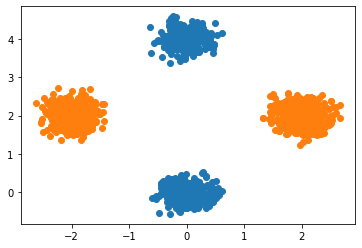

In [6]:
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(y[:, 0], y[:, 1])

In [7]:
mu_0 = ot.unif(x.shape[0])
mu_1 = ot.unif(y.shape[0])
M = ot.dist(x, y, metric='cityblock')
G = ot.emd(mu_0, mu_1, M)

<AxesSubplot:>

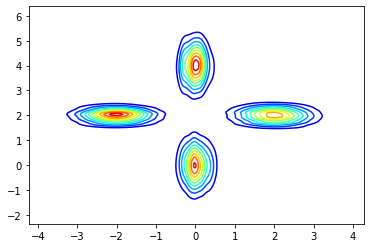

In [8]:
sns.kdeplot(x[:, 0], x[:, 1], cmap='jet', gridsize=50)
sns.kdeplot(y[:, 0], y[:, 1], cmap='jet', gridsize=50)

In [9]:
def get_support(x, y, G, interpolation_param=0.0):
    t = interpolation_param
    ind_i, ind_j = np.where(G != 0)
    support_t = []
    for i, j in zip(ind_i, ind_j):
        xi = x[i, :]
        yj = y[j, :]

        support_t.append((1 - t) * xi + t * yj)
    support_t = np.array(support_t)
    return support_t

In [10]:
tvec = np.linspace(0, 1, 20)
for t in tvec:
    tmp = get_support(x, y, G, interpolation_param=t)
    ax = sns.kdeplot(tmp[:, 0], tmp[:, 1], cmap='jet')
    ax.axis('off')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 6])
    plt.savefig('./results/dist_{}.png'.format(t))
    plt.close('all')

In [11]:
fp_in = "./results/dist_*.png"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp='./interpolation.gif', format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)